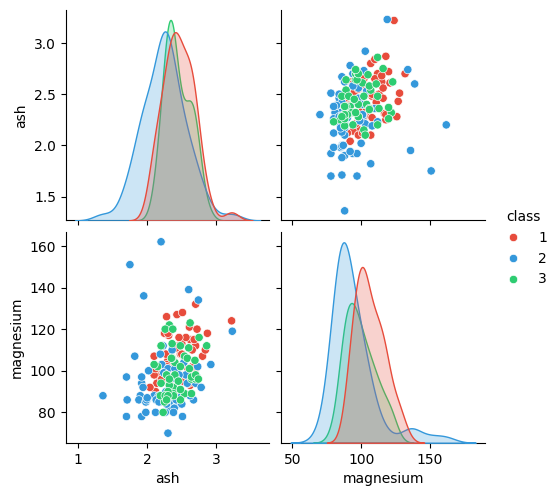

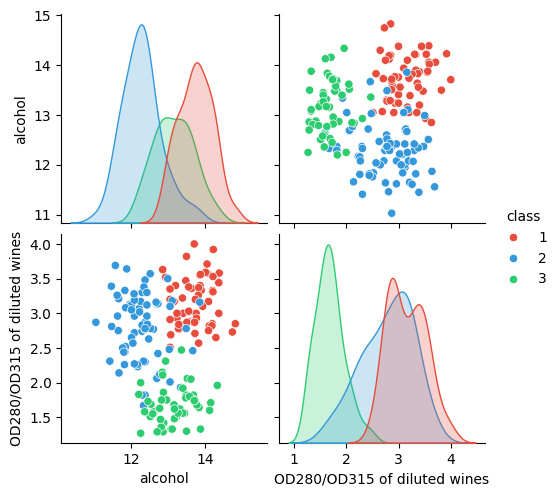

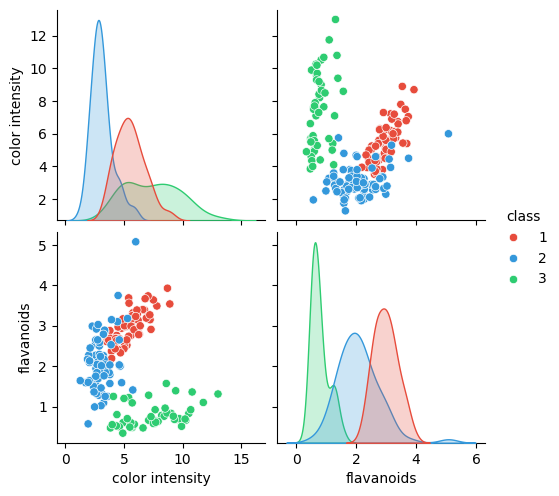

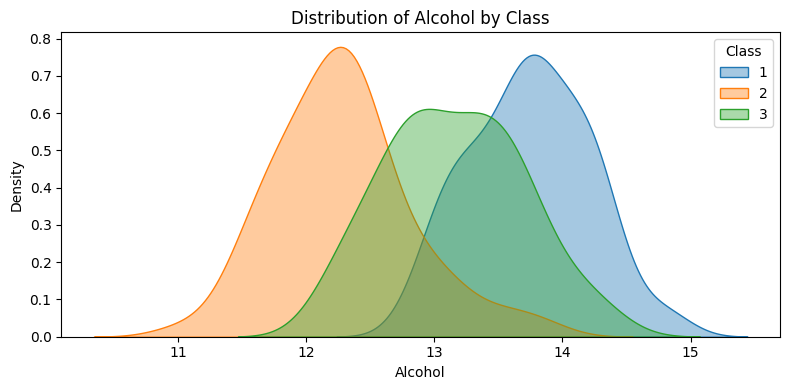

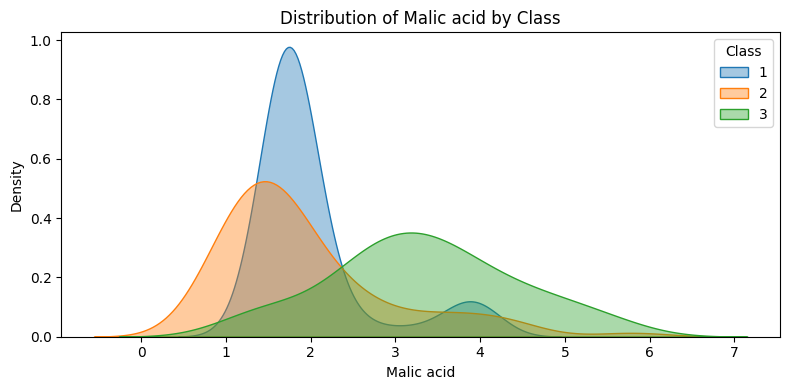

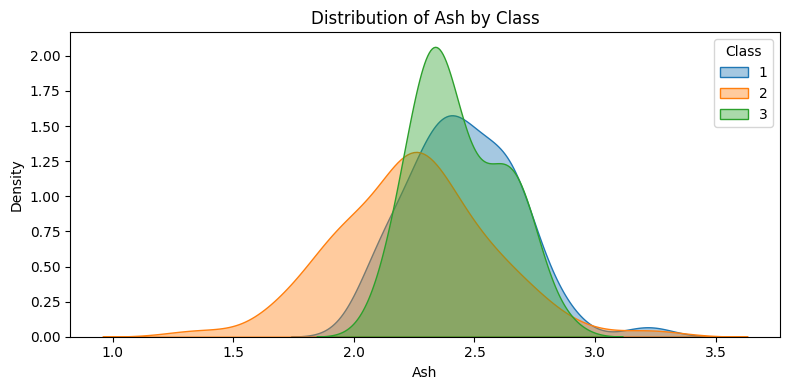

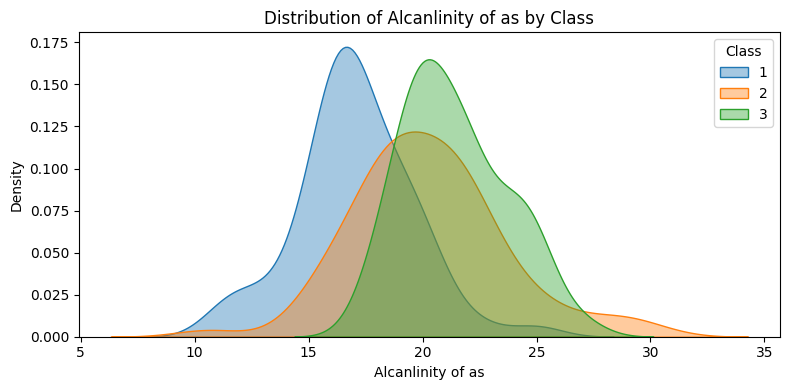

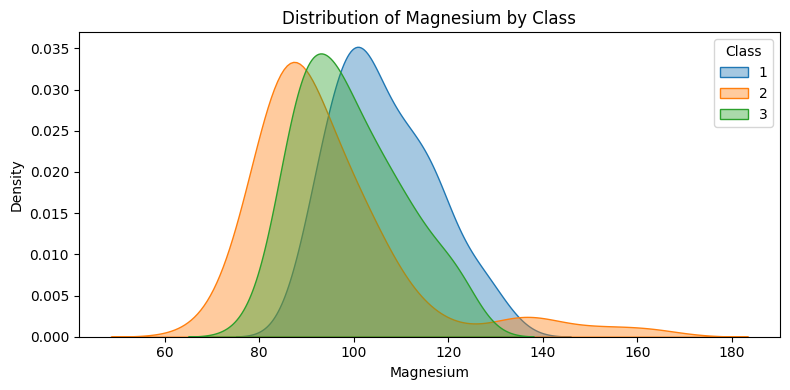

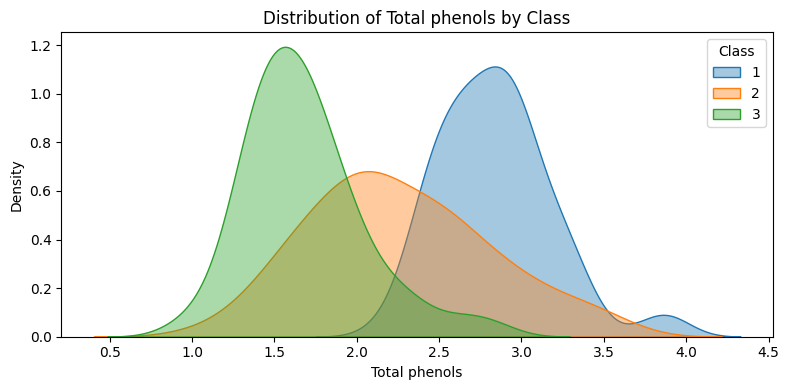

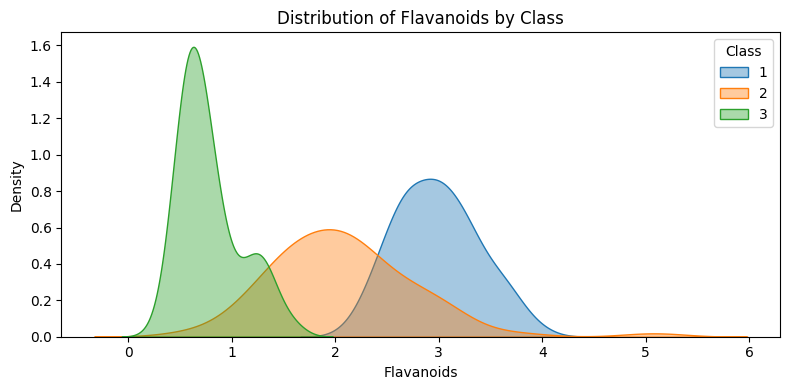

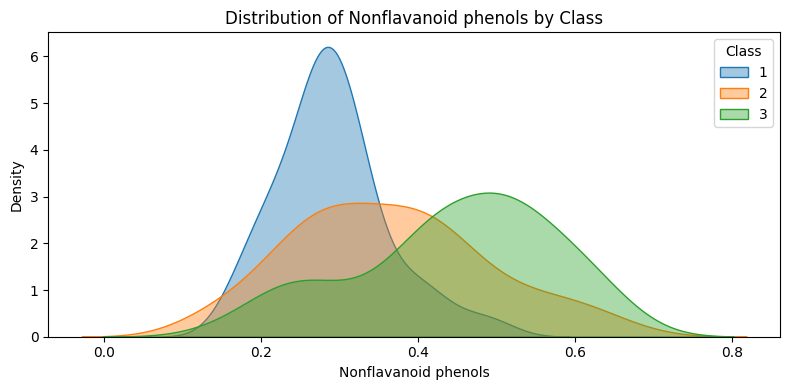

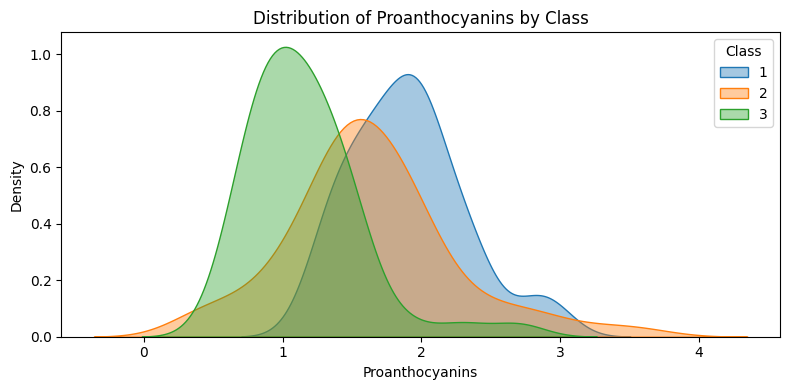

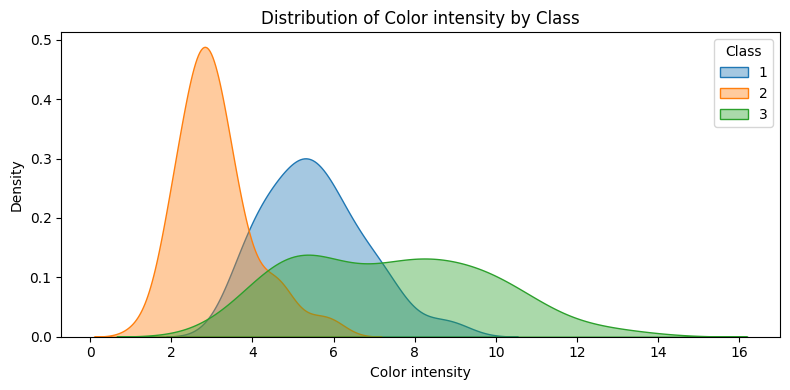

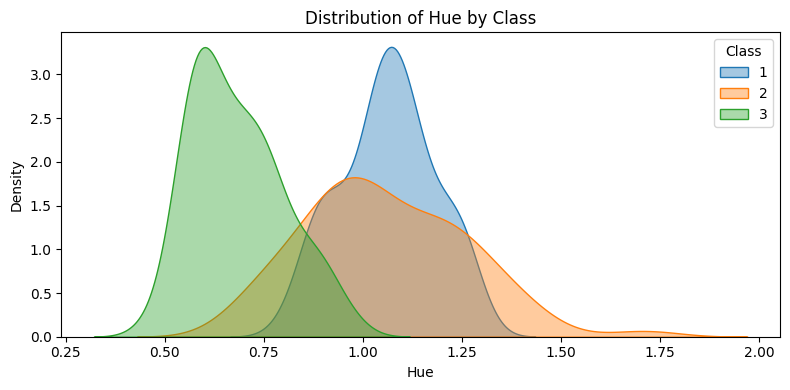

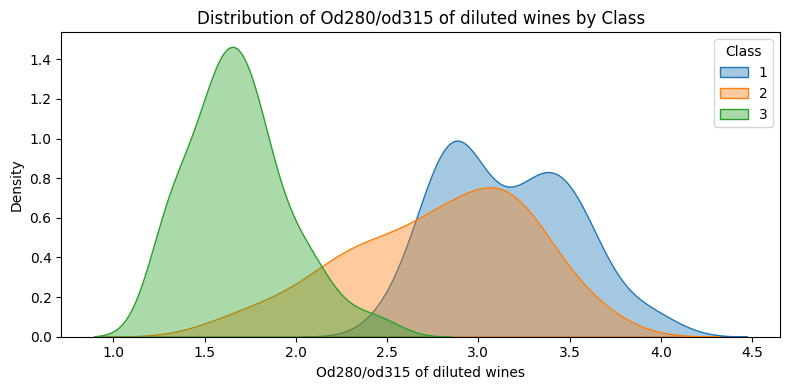

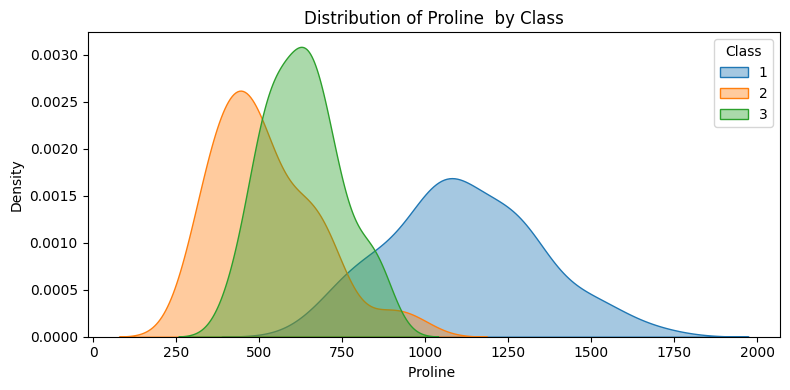

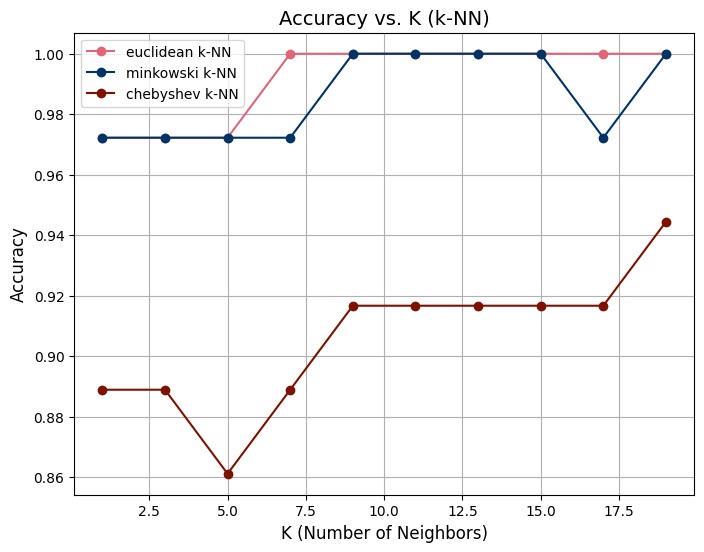

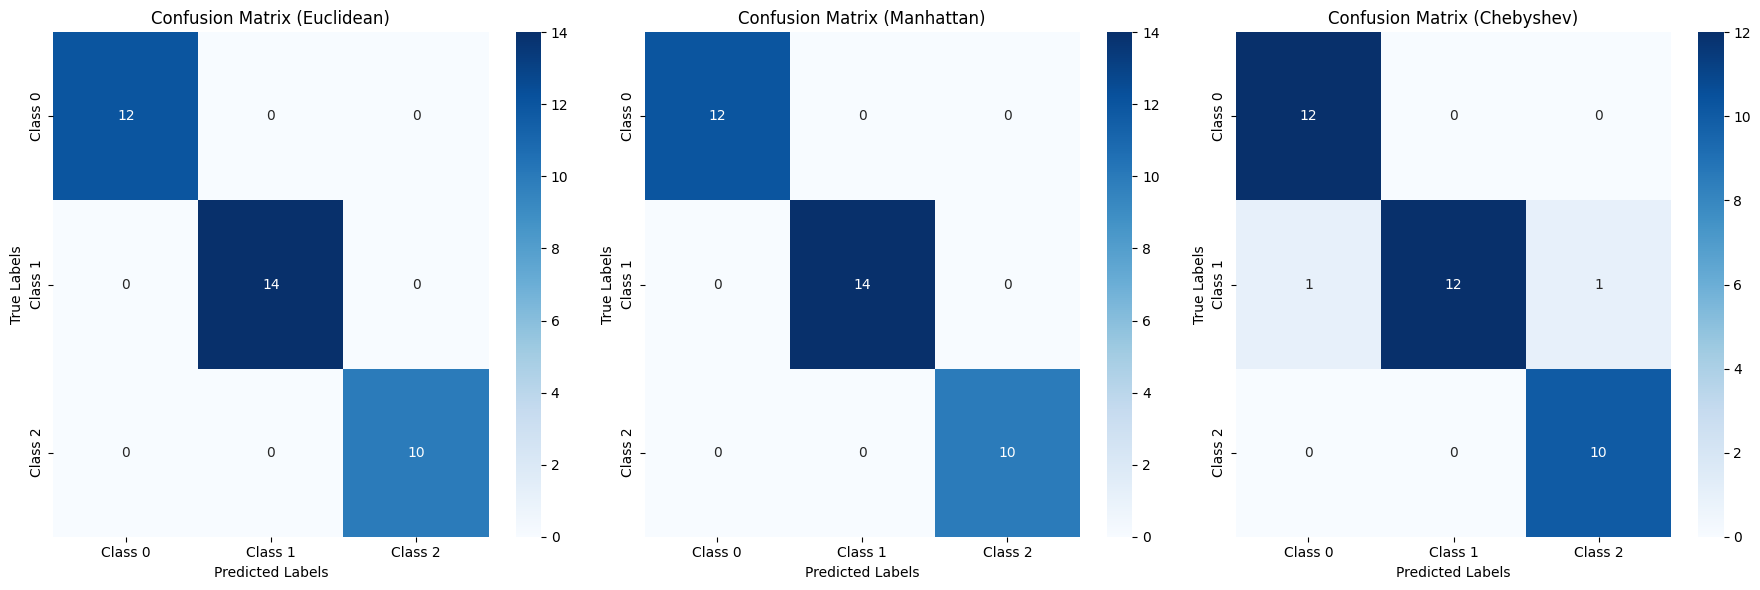

Classification Report for Euclidean at K=5:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Classification Report for Minkowski at K=5:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Classification Report for Chebyshev at K=5:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
#loading the dataset
theData = pd.read_csv('wine_data.csv')
#the feature labels were not included in the original dataset, thus I included them by hand
features=['alcohol','malic acid','ash','alcanlinity of as','magnesium','total phenols','flavanoids','nonflavanoid phenols','proanthocyanins','color intensity','hue','OD280/OD315 of diluted wines','proline ']

#visualization of some features
subset = theData[['ash', 'magnesium', 'class']]
custom_palette = {1: '#e74c3c', 2: '#3498db', 3: '#2ecc71'}
sns.pairplot(subset, hue='class', palette=custom_palette)
subset = theData[['alcohol', 'OD280/OD315 of diluted wines', 'class']]
sns.pairplot(subset, hue='class', palette=custom_palette)
subset = theData[['color intensity', 'flavanoids', 'class']]
sns.pairplot(subset, hue='class', palette=custom_palette)
plt.show()

#visualization of combined features
for feature in features:
    plt.figure(figsize=(8, 4))
    for label in theData['class'].unique():
        subset = theData[theData['class'] == label]
        sns.kdeplot(data=subset, x=feature, label=label, fill=True, alpha=0.4)
    plt.title(f"Distribution of {feature.capitalize()} by Class")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Density")
    plt.legend(title='Class')
    plt.tight_layout()
    plt.show()

#spliting the data into training (80%) and testing (20%) sets
x = theData.iloc[:, 1:]
y = theData.iloc[:, 0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

x_train= np.asarray(x_train)
y_train= np.asarray(y_train)
x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

#normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

#Calculate Euclidean distances
def euclidean(x_train, x_test_point):
    distances = np.sqrt(np.sum((x_train - x_test_point) ** 2, axis=1))
    return distances
#Calculate Minkowski distances
def minkowski(x_train, x_test_point, p=3):
    distances = np.sum(np.abs(x_train - x_test_point) ** p, axis=1) ** (1/p)
    return distances
#Calculate Chebyshev distances
def chebyshev(x_train, x_test_point):
    distances = np.max(np.abs(x_train - x_test_point), axis=1)
    return distances
#Get the indices of the K smallest distances
def NN(distance_point, K):
    nearest_indices = np.argsort(distance_point)[:K]
    return nearest_indices
#Use Counter to count the occurrences of labels in the K nearest neighbors
def voting(nearest_indices, y_train):
    counter_vote = Counter(y_train[nearest_indices])
    y_pred = counter_vote.most_common(1)[0][0] # Return the most common label
    return y_pred

def KNN_euclidean(x_train, y_train, x_test, K):
    y_pred = []
    # Loop over each test sample to make predictions
    for x_test_point in x_test:
        # Step 1: Calculate distances
        distance_point = euclidean(x_train, x_test_point)
        # Step 2: Get the nearest K neighbors
        nearest_indices = NN(distance_point, K)
        # Step 3: Perform majority voting based on nearest neighbors
        y_pred_point = voting(nearest_indices, y_train)
        # Append the prediction to the list
        y_pred.append(y_pred_point)
    return np.array(y_pred)  # Return predictions as a numpy array for easy handling

def KNN_minkowski(x_train, y_train, x_test, K):
    y_pred = []
    #Again, same steps with the Euclidean one
    for x_test_point in x_test:
        distance_point = minkowski(x_train, x_test_point)
        nearest_indices = NN(distance_point, K)
        y_pred_point = voting(nearest_indices, y_train)
        y_pred.append(y_pred_point)
    return np.array(y_pred)
def KNN_chebyshev(x_train, y_train, x_test, K):
    y_pred = []
    #Again, same steps with the Euclidean one
    for x_test_point in x_test:
        distance_point = chebyshev(x_train, x_test_point)
        nearest_indices = NN(distance_point, K)
        y_pred_point = voting(nearest_indices, y_train)
        y_pred.append(y_pred_point)
    return np.array(y_pred)
#for different K values find the accuracies
k_values = [1,3,5,7,9,11,13,15,17,19]
accuracies_scratch_euc = []
accuracies_scratch_min = []
accuracies_scratch_che = []
accuracies_sklearn = []

for K in k_values:
    #Our from-scratch-implementations
    y_pred_scratch_euc = KNN_euclidean(X_train, y_train, X_test, K)
    accuracy_scratch_euc = accuracy_score(y_test, y_pred_scratch_euc)
    accuracies_scratch_euc.append(accuracy_scratch_euc)

    y_pred_scratch_min = KNN_minkowski(X_train, y_train, X_test, K)
    accuracy_scratch_min = accuracy_score(y_test, y_pred_scratch_min)
    accuracies_scratch_min.append(accuracy_scratch_min)

    y_pred_scratch_che = KNN_chebyshev(X_train, y_train, X_test, K)
    accuracy_scratch_che = accuracy_score(y_test, y_pred_scratch_che)
    accuracies_scratch_che.append(accuracy_scratch_che)

    #scikit-learn k-NN implementation
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    y_pred_sklearn = knn.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    accuracies_sklearn.append(accuracy_sklearn)



# Plot Accuracy vs. K for both Custom and Sklearn KNN
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies_scratch_euc, marker='o', linestyle='-', color='#E06578', label='euclidean k-NN')
plt.plot(k_values, accuracies_scratch_min, marker='o', linestyle='-', color='#003366', label='minkowski k-NN')
plt.plot(k_values, accuracies_scratch_che, marker='o', linestyle='-', color='#7D1201', label='chebyshev k-NN')
plt.title('Accuracy vs. K (k-NN)', fontsize=14)
plt.xlabel('K (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for subplots

# Confusion Matrix for Euclidean distance
cm_euc = confusion_matrix(y_test, y_pred_scratch_euc)
sns.heatmap(cm_euc, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], ax=axs[0])
axs[0].set_title('Confusion Matrix (Euclidean)')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

# Confusion Matrix for Minkowski distance
cm_min = confusion_matrix(y_test, y_pred_scratch_min)
sns.heatmap(cm_min, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], ax=axs[1])
axs[1].set_title('Confusion Matrix (Manhattan)')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

# Confusion Matrix for Chebyshev distance
cm_che = confusion_matrix(y_test, y_pred_scratch_che)
sns.heatmap(cm_che, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], ax=axs[2])
axs[2].set_title('Confusion Matrix (Chebyshev)')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
plt.tight_layout()
plt.show()

# Classification Reports for all three distances
print("Classification Report for Euclidean at K=5:")
print(classification_report(y_test, y_pred_scratch_euc))
print("Classification Report for Minkowski at K=5:")
print(classification_report(y_test, y_pred_scratch_min))
print("Classification Report for Chebyshev at K=5:")
print(classification_report(y_test, y_pred_scratch_che))

